# Finance & Risk Analytics Project

#### Basic python packages loaded

In [744]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")


### Problem Statement:
Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.    

#### Importing the dataset

In [745]:
Company = pd.read_excel('Company_Data2015-2.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Fixing messy column names (containing spaces) for ease of use

In [746]:
Company.columns = Company.columns.str.strip().str.replace('[', ' ').str.replace(']', '').str.replace(' ', '_').str.replace('-', '_').str.replace('.', '').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_to_').str.replace('&','and').str.replace('Velocity','Vel').str.replace('Revenue','Rev').str.replace('Current','Curr').str.replace('earnings','earn').str.replace('expenses','exp').str.replace('Operating_Activities','Oper').str.replace('Investing_Activities','Inv').str.replace('Financing_Activities','Fin').str.replace('Production','Prod').str.replace('Liabilities','Liab').str.replace('Provisions','Prov')         

#### Checking top 5 rows again

In [747]:
Company.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [748]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Data types of all variables

In [749]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

In [750]:
Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [751]:
Company = Company.drop(['Co_Code','Co_Name'],axis = 1)
Company.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [752]:
Company.duplicated().sum()

0

### Part 1 - Credit Risk

### 1.1Outlier Treatment

#### Creating outlier identification (Lower & Upper whiskers) function

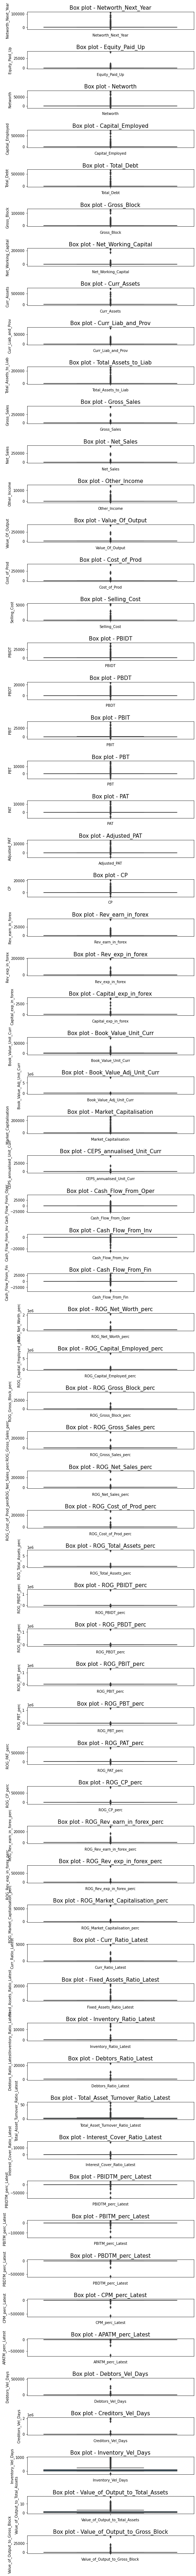

In [753]:
# Checking Outliers in dataset
col_names = list(Company.columns)

fig, ax = plt.subplots(len(col_names),figsize=(8,100))
fig.tight_layout(pad=4.0)

for i, col_val in enumerate(col_names):
    sns.boxplot(y=Company[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=15)
    ax[i].set_xlabel(col_val, fontsize=10)

plt.show()

#### There are outliers in the dataset, lets use capping method to treat them

In [754]:
def check_outlier(col_names):
    sorted(col_names)
    Q1,Q3=col_names.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

#### lets check outliers(Lower and Upper whiskers) in these variables

In [755]:
check_outlier(Company['Networth_Next_Year'])

(-175.74125, 303.52875000000006)

In [756]:
check_outlier(Company['Gross_Sales'])

(-359.76875, 603.4612500000001)

In [757]:
check_outlier(Company['Net_Sales'])

(-348.06000000000006, 583.94)

In [758]:
check_outlier(Company['PBT'])

(-11.28375, 18.64625)

#### Capping the outliers

In [759]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [760]:
for i in Company:
    Company[i]=treat_outlier(Company[i])

-17.445 3.985 123.80250000000001 1978.8225000000002 <built-in function min> <built-in function max>
0.5 3.75 19.517500000000002 131.24 <built-in function min> <built-in function max>
-11.697499999999998 3.8925 117.2975 1829.0825 <built-in function min> <built-in function max>
0.4225 7.602499999999999 226.60500000000002 3634.915 <built-in function min> <built-in function max>
0.0 0.03 72.35000000000001 1572.61 <built-in function min> <built-in function max>
0.0 0.57 131.895 1409.325 <built-in function min> <built-in function max>
-11.944999999999999 0.9424999999999999 61.175 827.735 <built-in function min> <built-in function max>
0.14 4.0 135.2775 2014.74 <built-in function min> <built-in function max>
0.02 0.7324999999999999 65.65 1021.03 <built-in function min> <built-in function max>
1.22 10.555 310.54 4568.7300000000005 <built-in function min> <built-in function max>
0.0 1.4425000000000001 242.25 2845.3725 <built-in function min> <built-in function max>
0.0 1.44 234.44000000000003 2

In [761]:
Company.shape

(3586, 65)

### 1.2 Missing Value Treatment

#### Lets check for missing values in the dataset¶

In [762]:
Company.isnull().sum()

Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Curr_Assets                            0
Curr_Liab_and_Prov                     0
Total_Assets_to_Liab                   0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Rev_earn_in_forex                      0
Rev_exp_in_forex

In [763]:
#Columns with missing values
print(np.where(Company.isnull().sum()>0))

(array([27, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 62], dtype=int64),)


In [764]:
Company.iloc[:,64].isnull().sum()

0

#### There are missing values in the dataset

#### Lets treat these missing values with median (replacement with median eliminates impact of outliers in the treatment)

In [765]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Company = pd.DataFrame(imputer.fit_transform(Company))
Company.columns=col_names
Company.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-17.445,131.24,-11.6975,0.4225,1572.61,1409.325,-11.945,40.50,1021.03,109.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.0,0.00,0.00
1,-17.445,131.24,-11.6975,3634.9150,1572.61,1409.325,-11.945,2014.74,1021.03,4568.73,...,-10.30,-39.74,-57.74,-57.74,-87.18,29.00,101.00,2.0,0.31,0.24
2,-17.445,131.24,1829.0825,3634.9150,1572.61,1409.325,827.735,2014.74,1021.03,4568.73,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.00,615.25,0.0,-0.03,-0.26
3,-17.445,131.24,-11.6975,3634.9150,1572.61,1409.325,-11.945,2014.74,1021.03,4568.73,...,-3.33,-7.21,-48.13,-47.70,-51.58,93.00,63.00,2.0,0.24,1.90
4,-17.445,131.24,-11.6975,3634.9150,1572.61,1409.325,827.735,2014.74,1021.03,4568.73,...,-295.55,-400.55,-845.88,379.79,274.79,715.25,615.25,0.0,0.01,0.05


### 1.3 Transform Target variable into 0 and 1

In [766]:
# Transforming Target variable 'Networth_Next_Year' into 0 & 1

Company['default']=np.where((Company['Networth_Next_Year']> 0),0,1)

#### Checking top 10 rows

In [767]:
Company[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-17.445
1,1,-17.445
2,1,-17.445
3,1,-17.445
4,1,-17.445
5,1,-17.445
6,1,-17.445
7,1,-17.445
8,1,-17.445
9,1,-17.445


In [768]:
#Checking bottom 10 rows
Company[['default','Networth_Next_Year']].tail(10)

,default,Networth_Next_Year
3576,0,1978.8225
3577,0,1978.8225
3578,0,1978.8225
3579,0,1978.8225
3580,0,1978.8225
3581,0,1978.8225
3582,0,1978.8225
3583,0,1978.8225
3584,0,1978.8225
3585,0,1978.8225


In [769]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

#### Checking the proportion of default

In [770]:
388/(3198+388)

0.10819854991634133

#### 10.8% Companies in the total dataset are prone to default

#### Checking summary statistics of default variable

In [771]:
Company['default'].describe()

count    3586.000000
mean        0.108199
std         0.310674
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

#### Average default rate matches with overall default rate of 10.8%

#### Let us check significance of variables 'PBT' in predicting Networth_Next_Year(default) before proceeding to model development

In [772]:
#Checking Descriptive statistics of the variable 'PBT'

Company['ROG_PBT_perc'].describe()

count    3586.000000
mean       -8.115020
std       197.883559
min      -513.947500
25%       -41.235000
50%         0.025000
75%        61.957500
max       372.377500
Name: ROG_PBT_perc, dtype: float64

In [773]:
#Checking Descriptive statistics of the variable 'PBT' for non defaulters

Company.loc[Company['default'] == 0,'ROG_PBT_perc'].describe()

count    3198.000000
mean       -1.161241
std       193.633271
min      -513.947500
25%       -37.457500
50%         2.175000
75%        63.140000
max       372.377500
Name: ROG_PBT_perc, dtype: float64

#### For companies whose have not defaulted, median 'Profit before tax is about 2.1'

In [774]:
#Checking Descriptive statistics of the variable 'PBT' for defaulters

Company.loc[Company['default'] == 1,'ROG_PBT_perc'].describe()

count    388.000000
mean     -65.429936
std      222.064802
min     -513.947500
25%     -100.055000
50%        0.000000
75%       50.000000
max      372.377500
Name: ROG_PBT_perc, dtype: float64

#### For companies whose have defaulted, median 'Profit before tax is about 0'

In conclusion what it means is, typical good companies makes a profit of about 2.1 units per 100 units of income
And a typical defaulted companies loses about 0 units per 100 units of income

### 1.4 Univariate analysis

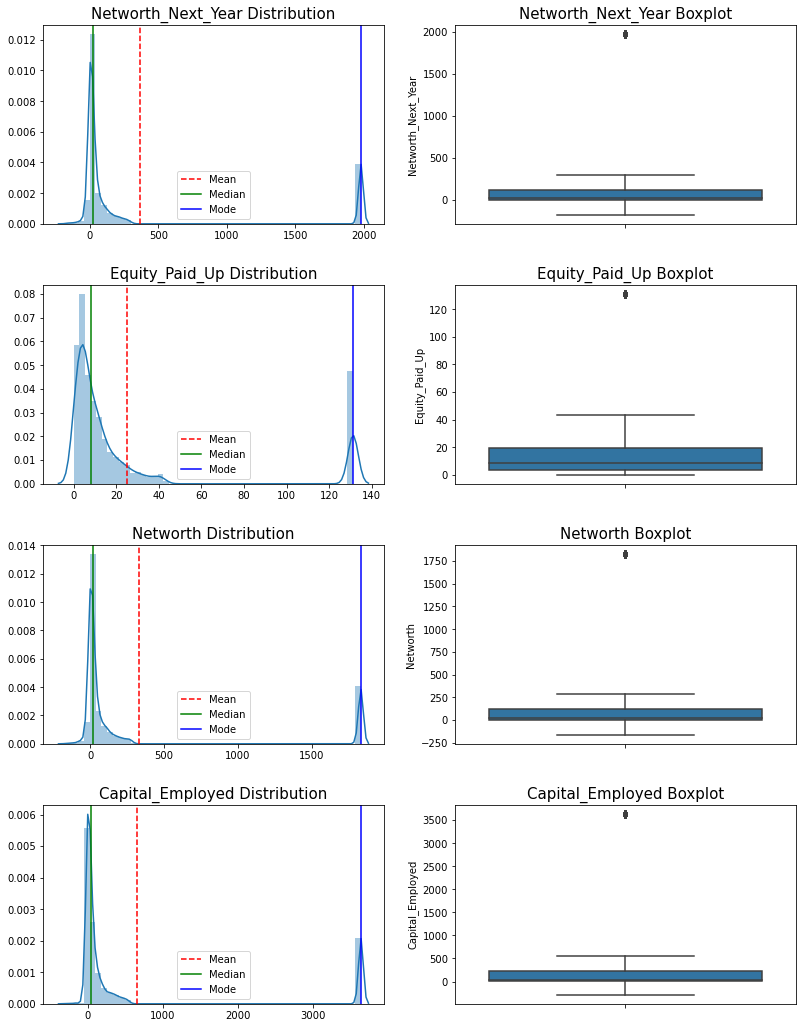

In [775]:
## Univariate analysis for first 4 columns

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 15)
fig.tight_layout(pad=4.0)

mean=Company['Networth_Next_Year'].mean()
median=Company['Networth_Next_Year'].median()
mode=Company['Networth_Next_Year'].mode().array[0]

a = sns.distplot(Company['Networth_Next_Year'] , axlabel=False, ax=axes[0][0])
a.set_title("Networth_Next_Year Distribution",fontsize=15)
axes[0][0].axvline(mean, color='r', linestyle='--')
axes[0][0].axvline(median, color='g', linestyle='-')
axes[0][0].axvline(mode, color='b', linestyle='-')
axes[0][0].legend({'Mean':mean,'Median':median,'Mode':mode})

a = sns.boxplot(Company['Networth_Next_Year'], orient = "v" , ax=axes[0][1])
a.set_title("Networth_Next_Year Boxplot",fontsize=15)

mean1=Company['Equity_Paid_Up'].mean()
median1=Company['Equity_Paid_Up'].median()
mode1=Company['Equity_Paid_Up'].mode().array[0]

a = sns.distplot(Company['Equity_Paid_Up'] , axlabel=False, ax=axes[1][0])
a.set_title("Equity_Paid_Up Distribution",fontsize=15)
axes[1][0].axvline(mean1, color='r', linestyle='--')
axes[1][0].axvline(median1, color='g', linestyle='-')
axes[1][0].axvline(mode1, color='b', linestyle='-')
axes[1][0].legend({'Mean':mean1,'Median':median1,'Mode':mode1})

a = sns.boxplot(Company['Equity_Paid_Up'] , orient = "v" , ax=axes[1][1])
a.set_title("Equity_Paid_Up Boxplot",fontsize=15)

mean2=Company['Networth'].mean()
median2=Company['Networth'].median()
mode2=Company['Networth'].mode().array[0]

a = sns.distplot(Company['Networth'] , axlabel=False, ax=axes[2][0])
a.set_title("Networth Distribution",fontsize=15)
axes[2][0].axvline(mean2, color='r', linestyle='--')
axes[2][0].axvline(median2, color='g', linestyle='-')
axes[2][0].axvline(mode2, color='b', linestyle='-')
axes[2][0].legend({'Mean':mean2,'Median':median2,'Mode':mode2})

a = sns.boxplot(Company['Networth'] , orient = "v" , ax=axes[2][1])
a.set_title("Networth Boxplot",fontsize=15)

mean3=Company['Capital_Employed'].mean()
median3=Company['Capital_Employed'].median()
mode3=Company['Capital_Employed'].mode().array[0]

a = sns.distplot(Company['Capital_Employed'] , axlabel=False, ax=axes[3][0])
a.set_title("Capital_Employed Distribution",fontsize=15)
axes[3][0].axvline(mean3, color='r', linestyle='--')
axes[3][0].axvline(median3, color='g', linestyle='-')
axes[3][0].axvline(mode3, color='b', linestyle='-')
axes[3][0].legend({'Mean':mean3,'Median':median3,'Mode':mode3})

a = sns.boxplot(Company['Capital_Employed'] , orient = "v" , ax=axes[3][1])
a.set_title("Capital_Employed Boxplot",fontsize=15)

plt.show()

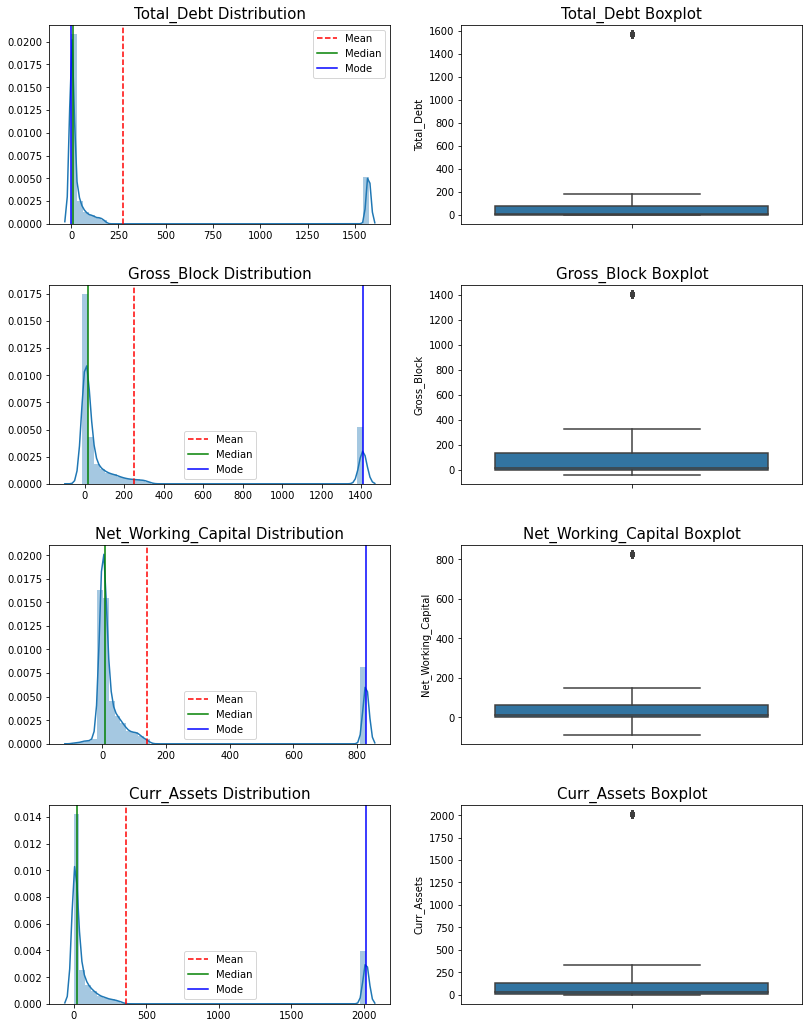

In [776]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 15)
fig.tight_layout(pad=4.0)

mean=Company['Total_Debt'].mean()
median=Company['Total_Debt'].median()
mode=Company['Total_Debt'].mode().array[0]

a = sns.distplot(Company['Total_Debt'] , axlabel=False, ax=axes[0][0])
a.set_title("Total_Debt Distribution",fontsize=15)
axes[0][0].axvline(mean, color='r', linestyle='--')
axes[0][0].axvline(median, color='g', linestyle='-')
axes[0][0].axvline(mode, color='b', linestyle='-')
axes[0][0].legend({'Mean':mean,'Median':median,'Mode':mode})

a = sns.boxplot(Company['Total_Debt'], orient = "v" , ax=axes[0][1])
a.set_title("Total_Debt Boxplot",fontsize=15)

mean1=Company['Gross_Block'].mean()
median1=Company['Gross_Block'].median()
mode1=Company['Gross_Block'].mode().array[0]

a = sns.distplot(Company['Gross_Block'] , axlabel=False, ax=axes[1][0])
a.set_title("Gross_Block Distribution",fontsize=15)
axes[1][0].axvline(mean1, color='r', linestyle='--')
axes[1][0].axvline(median1, color='g', linestyle='-')
axes[1][0].axvline(mode1, color='b', linestyle='-')
axes[1][0].legend({'Mean':mean1,'Median':median1,'Mode':mode1})

a = sns.boxplot(Company['Gross_Block'] , orient = "v" , ax=axes[1][1])
a.set_title("Gross_Block Boxplot",fontsize=15)

mean2=Company['Net_Working_Capital'].mean()
median2=Company['Net_Working_Capital'].median()
mode2=Company['Net_Working_Capital'].mode().array[0]

a = sns.distplot(Company['Net_Working_Capital'] , axlabel=False, ax=axes[2][0])
a.set_title("Net_Working_Capital Distribution",fontsize=15)
axes[2][0].axvline(mean2, color='r', linestyle='--')
axes[2][0].axvline(median2, color='g', linestyle='-')
axes[2][0].axvline(mode2, color='b', linestyle='-')
axes[2][0].legend({'Mean':mean2,'Median':median2,'Mode':mode2})

a = sns.boxplot(Company['Net_Working_Capital'] , orient = "v" , ax=axes[2][1])
a.set_title("Net_Working_Capital Boxplot",fontsize=15)

mean3=Company['Curr_Assets'].mean()
median3=Company['Curr_Assets'].median()
mode3=Company['Curr_Assets'].mode().array[0]

a = sns.distplot(Company['Curr_Assets'] , axlabel=False, ax=axes[3][0])
a.set_title("Curr_Assets Distribution",fontsize=15)
axes[3][0].axvline(mean3, color='r', linestyle='--')
axes[3][0].axvline(median3, color='g', linestyle='-')
axes[3][0].axvline(mode3, color='b', linestyle='-')
axes[3][0].legend({'Mean':mean3,'Median':median3,'Mode':mode3})

a = sns.boxplot(Company['Curr_Assets'] , orient = "v" , ax=axes[3][1])
a.set_title("Curr_Assets Boxplot",fontsize=15)

plt.show()

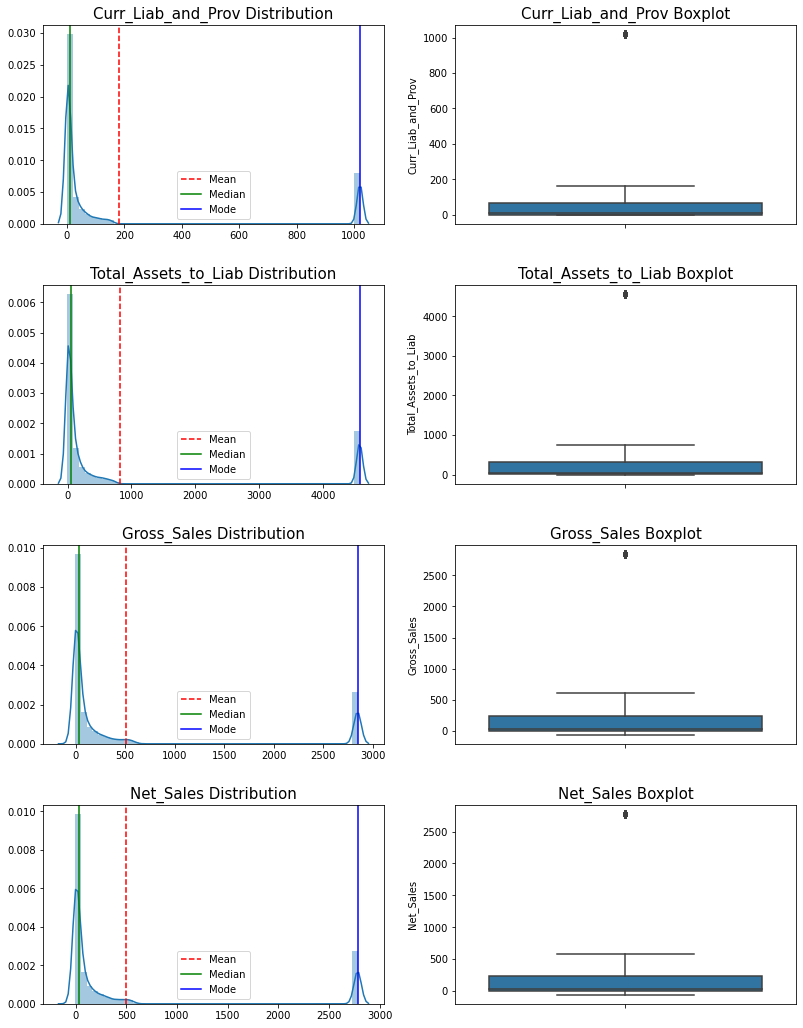

In [777]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 15)
fig.tight_layout(pad=4.0)

mean=Company['Curr_Liab_and_Prov'].mean()
median=Company['Curr_Liab_and_Prov'].median()
mode=Company['Curr_Liab_and_Prov'].mode().array[0]

a = sns.distplot(Company['Curr_Liab_and_Prov'] , axlabel=False, ax=axes[0][0])
a.set_title("Curr_Liab_and_Prov Distribution",fontsize=15)
axes[0][0].axvline(mean, color='r', linestyle='--')
axes[0][0].axvline(median, color='g', linestyle='-')
axes[0][0].axvline(mode, color='b', linestyle='-')
axes[0][0].legend({'Mean':mean,'Median':median,'Mode':mode})

a = sns.boxplot(Company['Curr_Liab_and_Prov'], orient = "v" , ax=axes[0][1])
a.set_title("Curr_Liab_and_Prov Boxplot",fontsize=15)

mean1=Company['Total_Assets_to_Liab'].mean()
median1=Company['Total_Assets_to_Liab'].median()
mode1=Company['Total_Assets_to_Liab'].mode().array[0]

a = sns.distplot(Company['Total_Assets_to_Liab'] , axlabel=False, ax=axes[1][0])
a.set_title("Total_Assets_to_Liab Distribution",fontsize=15)
axes[1][0].axvline(mean1, color='r', linestyle='--')
axes[1][0].axvline(median1, color='g', linestyle='-')
axes[1][0].axvline(mode1, color='b', linestyle='-')
axes[1][0].legend({'Mean':mean1,'Median':median1,'Mode':mode1})

a = sns.boxplot(Company['Total_Assets_to_Liab'] , orient = "v" , ax=axes[1][1])
a.set_title("Total_Assets_to_Liab Boxplot",fontsize=15)

mean2=Company['Gross_Sales'].mean()
median2=Company['Gross_Sales'].median()
mode2=Company['Gross_Sales'].mode().array[0]

a = sns.distplot(Company['Gross_Sales'] , axlabel=False, ax=axes[2][0])
a.set_title("Gross_Sales Distribution",fontsize=15)
axes[2][0].axvline(mean2, color='r', linestyle='--')
axes[2][0].axvline(median2, color='g', linestyle='-')
axes[2][0].axvline(mode2, color='b', linestyle='-')
axes[2][0].legend({'Mean':mean2,'Median':median2,'Mode':mode2})

a = sns.boxplot(Company['Gross_Sales'] , orient = "v" , ax=axes[2][1])
a.set_title("Gross_Sales Boxplot",fontsize=15)

mean3=Company['Net_Sales'].mean()
median3=Company['Net_Sales'].median()
mode3=Company['Net_Sales'].mode().array[0]

a = sns.distplot(Company['Net_Sales'] , axlabel=False, ax=axes[3][0])
a.set_title("Net_Sales Distribution",fontsize=15)
axes[3][0].axvline(mean3, color='r', linestyle='--')
axes[3][0].axvline(median3, color='g', linestyle='-')
axes[3][0].axvline(mode3, color='b', linestyle='-')
axes[3][0].legend({'Mean':mean3,'Median':median3,'Mode':mode3})

a = sns.boxplot(Company['Net_Sales'] , orient = "v" , ax=axes[3][1])
a.set_title("Net_Sales Boxplot",fontsize=15)

plt.show()

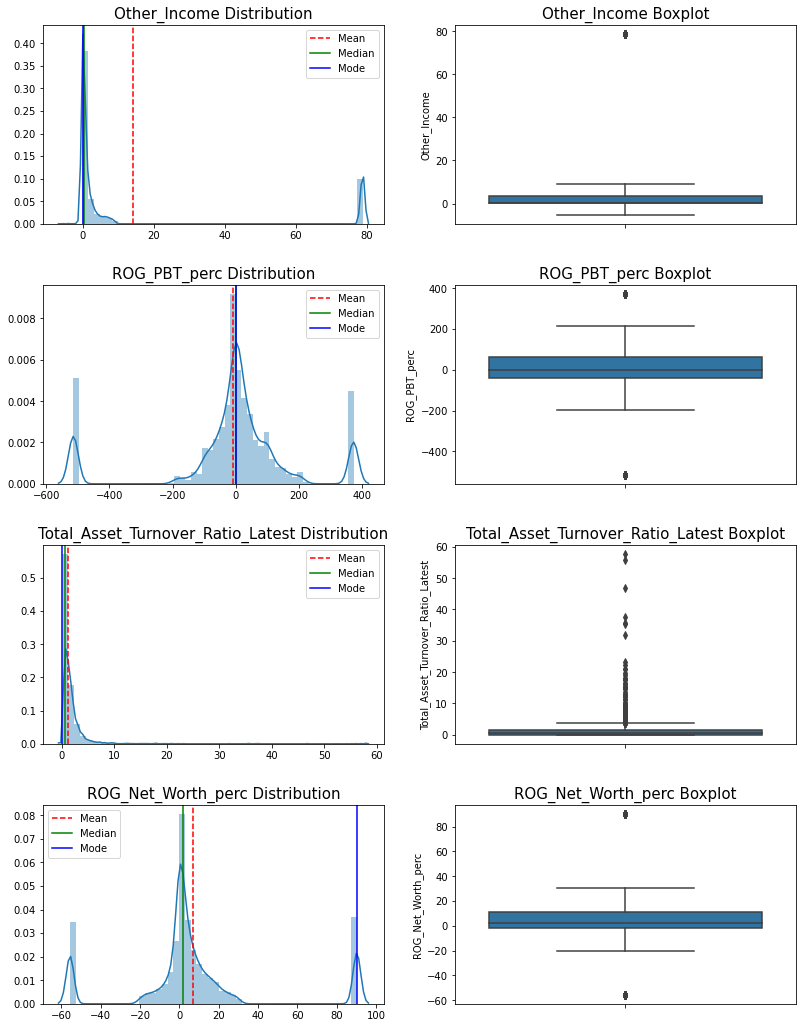

In [778]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 15)
fig.tight_layout(pad=4.0)

mean=Company['Other_Income'].mean()
median=Company['Other_Income'].median()
mode=Company['Other_Income'].mode().array[0]

a = sns.distplot(Company['Other_Income'] , axlabel=False, ax=axes[0][0])
a.set_title("Other_Income Distribution",fontsize=15)
axes[0][0].axvline(mean, color='r', linestyle='--')
axes[0][0].axvline(median, color='g', linestyle='-')
axes[0][0].axvline(mode, color='b', linestyle='-')
axes[0][0].legend({'Mean':mean,'Median':median,'Mode':mode})

a = sns.boxplot(Company['Other_Income'], orient = "v" , ax=axes[0][1])
a.set_title("Other_Income Boxplot",fontsize=15)

mean1=Company['ROG_PBT_perc'].mean()
median1=Company['ROG_PBT_perc'].median()
mode1=Company['ROG_PBT_perc'].mode().array[0]

a = sns.distplot(Company['ROG_PBT_perc'] , axlabel=False, ax=axes[1][0])
a.set_title("ROG_PBT_perc Distribution",fontsize=15)
axes[1][0].axvline(mean1, color='r', linestyle='--')
axes[1][0].axvline(median1, color='g', linestyle='-')
axes[1][0].axvline(mode1, color='b', linestyle='-')
axes[1][0].legend({'Mean':mean1,'Median':median1,'Mode':mode1})

a = sns.boxplot(Company['ROG_PBT_perc'] , orient = "v" , ax=axes[1][1])
a.set_title("ROG_PBT_perc Boxplot",fontsize=15)

mean2=Company['Total_Asset_Turnover_Ratio_Latest'].mean()
median2=Company['Total_Asset_Turnover_Ratio_Latest'].median()
mode2=Company['Total_Asset_Turnover_Ratio_Latest'].mode().array[0]

a = sns.distplot(Company['Total_Asset_Turnover_Ratio_Latest'] , axlabel=False, ax=axes[2][0])
a.set_title("Total_Asset_Turnover_Ratio_Latest Distribution",fontsize=15)
axes[2][0].axvline(mean2, color='r', linestyle='--')
axes[2][0].axvline(median2, color='g', linestyle='-')
axes[2][0].axvline(mode2, color='b', linestyle='-')
axes[2][0].legend({'Mean':mean2,'Median':median2,'Mode':mode2})

a = sns.boxplot(Company['Total_Asset_Turnover_Ratio_Latest'] , orient = "v" , ax=axes[2][1])
a.set_title("Total_Asset_Turnover_Ratio_Latest Boxplot",fontsize=15)

mean3=Company['ROG_Net_Worth_perc'].mean()
median3=Company['ROG_Net_Worth_perc'].median()
mode3=Company['ROG_Net_Worth_perc'].mode().array[0]

a = sns.distplot(Company['ROG_Net_Worth_perc'] , axlabel=False, ax=axes[3][0])
a.set_title("ROG_Net_Worth_perc Distribution",fontsize=15)
axes[3][0].axvline(mean3, color='r', linestyle='--')
axes[3][0].axvline(median3, color='g', linestyle='-')
axes[3][0].axvline(mode3, color='b', linestyle='-')
axes[3][0].legend({'Mean':mean3,'Median':median3,'Mode':mode3})

a = sns.boxplot(Company['ROG_Net_Worth_perc'] , orient = "v" , ax=axes[3][1])
a.set_title("ROG_Net_Worth_perc Boxplot",fontsize=15)

plt.show()

In [779]:
from scipy.stats import skew 
Company.skew()   # to measure the skeweness of every attribute

Networth_Next_Year                    1.751175
Equity_Paid_Up                        2.086800
Networth                              1.799108
Capital_Employed                      1.783536
Total_Debt                            1.815459
Gross_Block                           1.888628
Net_Working_Capital                   1.924737
Curr_Assets                           1.818667
Curr_Liab_and_Prov                    1.808656
Total_Assets_to_Liab                  1.825442
Gross_Sales                           1.858550
Net_Sales                             1.855065
Other_Income                          1.764381
Value_Of_Output                       1.848036
Cost_of_Prod                          1.831873
Selling_Cost                          1.753899
PBIDT                                 1.754702
PBDT                                  1.668444
PBIT                                  1.759498
PBT                                   1.604391
PAT                                   1.573827
Adjusted_PAT 

### Bi-Variate Analysis

In [780]:
Company.corr() 

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
Networth_Next_Year,1.000000,0.591766,0.958037,0.839402,0.567367,0.665229,0.650096,0.764727,0.711650,0.829658,...,-0.015428,-0.011898,-0.012785,-0.010945,-0.077450,-0.059409,-0.015042,0.028903,-0.031814,-0.183609
Equity_Paid_Up,0.591766,1.000000,0.585595,0.625078,0.520523,0.530875,0.432301,0.572595,0.585787,0.630790,...,-0.017364,-0.018591,-0.019147,-0.017916,-0.001851,0.040721,0.001258,-0.076554,-0.025534,0.009597
Networth,0.958037,0.585595,1.000000,0.855243,0.574070,0.673288,0.656927,0.774517,0.723795,0.844782,...,-0.017945,-0.013175,-0.014073,-0.012132,-0.067701,-0.047940,-0.008009,0.013773,-0.034885,-0.169251
Capital_Employed,0.839402,0.625078,0.855243,1.000000,0.740477,0.753488,0.723015,0.861470,0.792641,0.960101,...,-0.019343,-0.013838,-0.014872,-0.012975,-0.033569,-0.021784,0.014218,-0.001161,-0.045517,-0.093699
Total_Debt,0.567367,0.520523,0.574070,0.740477,1.000000,0.702126,0.633140,0.728480,0.693117,0.740431,...,-0.056574,-0.056983,-0.057039,-0.055369,0.003537,0.023087,0.044610,0.001038,-0.067014,0.045324
Gross_Block,0.665229,0.530875,0.673288,0.753488,0.702126,1.000000,0.568130,0.716662,0.750918,0.763350,...,-0.013283,-0.003161,-0.003340,-0.002926,-0.089277,-0.053190,0.030799,0.084278,-0.164264,-0.029339
Net_Working_Capital,0.650096,0.432301,0.656927,0.723015,0.633140,0.568130,1.000000,0.809420,0.634590,0.722975,...,-0.016048,0.001055,0.000511,0.000165,0.012464,-0.022863,0.065405,0.058143,-0.032306,-0.092201
Curr_Assets,0.764727,0.572595,0.774517,0.861470,0.728480,0.716662,0.809420,1.000000,0.849171,0.891631,...,-0.021365,-0.015711,-0.016760,-0.014844,-0.010223,-0.012596,0.032367,0.060960,-0.036689,-0.074177
Curr_Liab_and_Prov,0.711650,0.585787,0.723795,0.792641,0.693117,0.750918,0.634590,0.849171,1.000000,0.841401,...,-0.056278,-0.056190,-0.056682,-0.055853,-0.027499,0.039102,0.035391,0.064392,-0.055396,-0.003643
Total_Assets_to_Liab,0.829658,0.630790,0.844782,0.960101,0.740431,0.763350,0.722975,0.891631,0.841401,1.000000,...,-0.021238,-0.015904,-0.016944,-0.015066,-0.030827,-0.007150,0.011021,0.015642,-0.040025,-0.077937


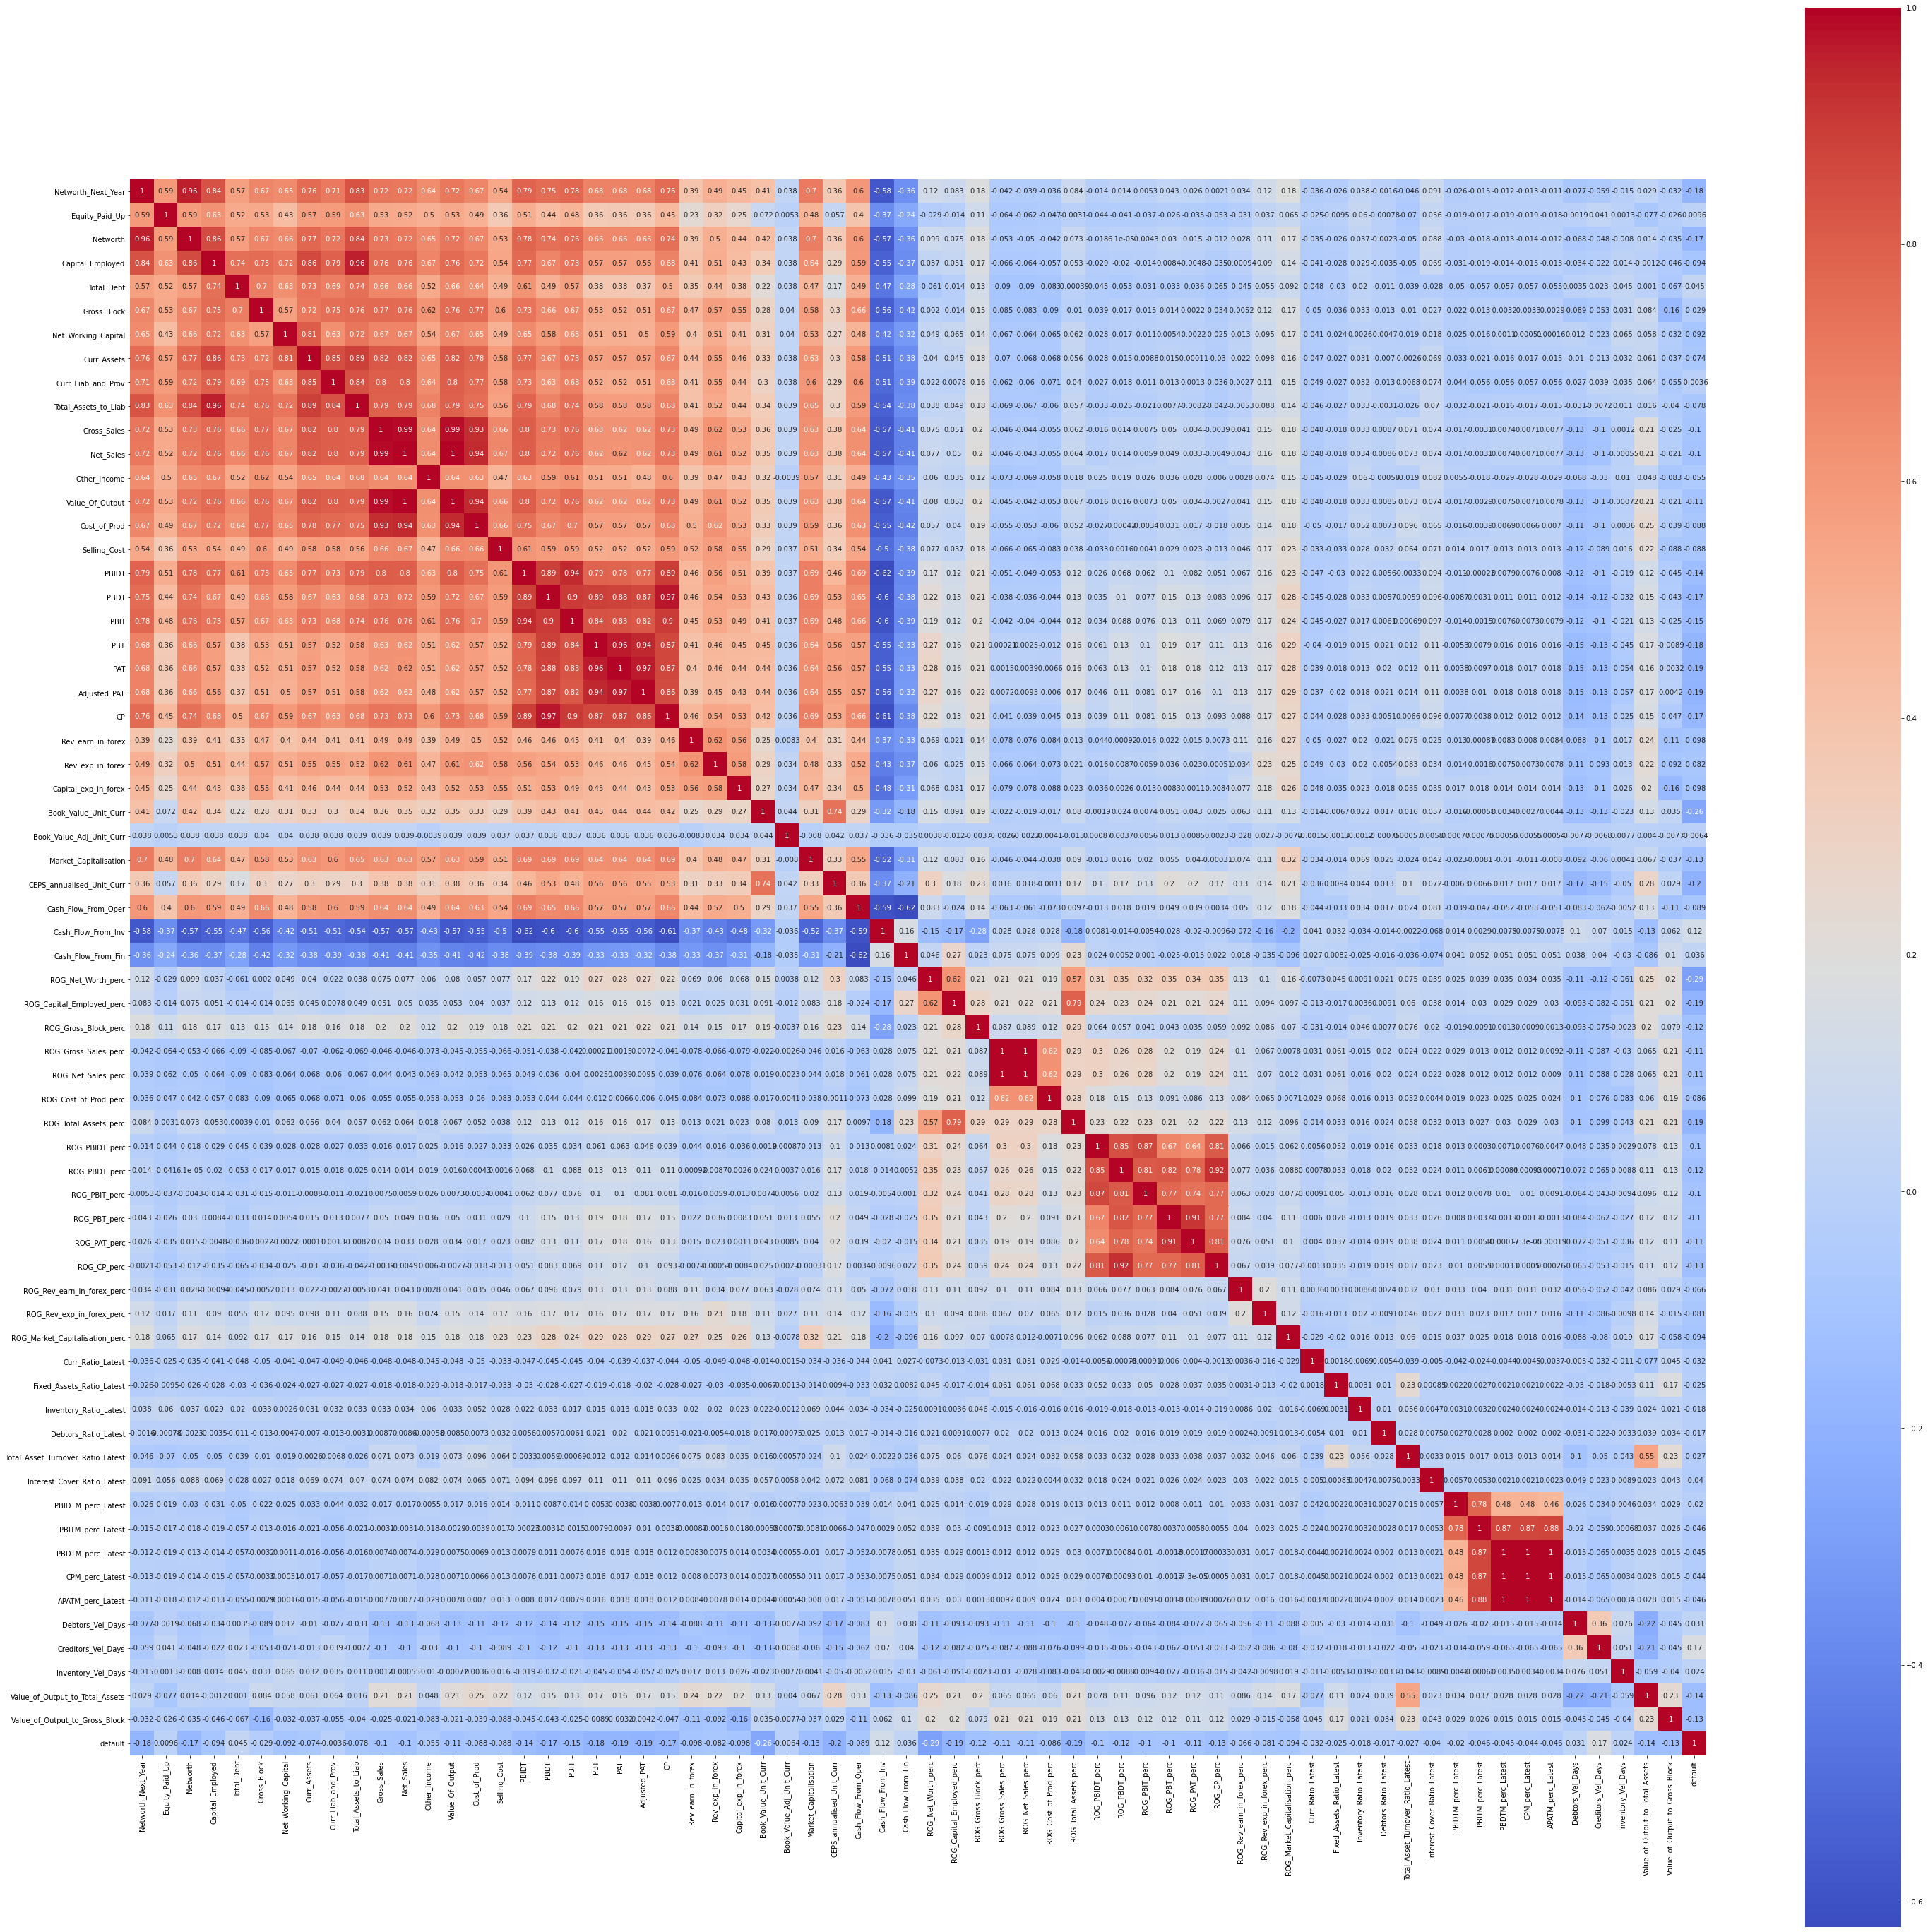

In [781]:
# Checking for multicolinearity
plt.figure(figsize=(50,50))  
p=sns.heatmap(Company.corr(), annot=True,cmap='coolwarm',square=True)

#### Insights:

- First few variables (approx. 29 variables) are highly correlated to each other which shows in red - orange color.

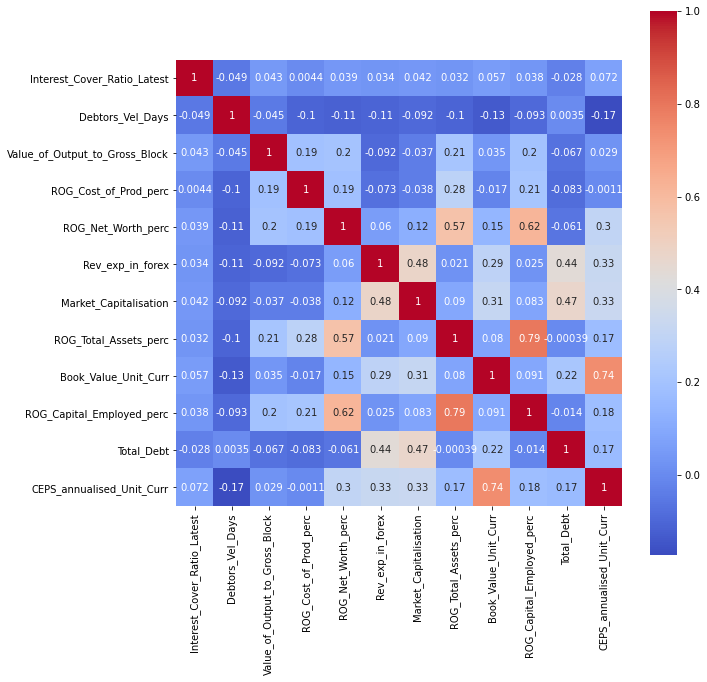

In [782]:
# Selected variables without multicolinearity
plt.figure(figsize=(10,10))  
p=sns.heatmap(Company[['Interest_Cover_Ratio_Latest', 'Debtors_Vel_Days', 'Value_of_Output_to_Gross_Block', 'ROG_Cost_of_Prod_perc', 'ROG_Net_Worth_perc', 'Rev_exp_in_forex', 'Market_Capitalisation', 'ROG_Total_Assets_perc', 'Book_Value_Unit_Curr', 'ROG_Capital_Employed_perc', 'Total_Debt', 'CEPS_annualised_Unit_Curr']].corr(), annot=True,cmap='coolwarm',square=True)

### 1.5 Train Test Split

- Splitting arrays or matrices into random train and test subsets. Model will be fitted on train set and predictions will be made on the test set

In [783]:
X = Company.drop(['default','Networth_Next_Year'], axis=1)
y = Company['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=Company['default'])

Company_train = pd.concat([X_train,y_train], axis=1)
Company_test = pd.concat([X_test,y_test], axis=1)

Company_train.to_csv('Company_train.csv',index=False)
Company_test.to_csv('Company_test.csv',index=False)

In [784]:
Company_train.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Curr_Assets',
       'Curr_Liab_and_Prov', 'Total_Assets_to_Liab', 'Gross_Sales',
       'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Prod',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT',
       'CP', 'Rev_earn_in_forex', 'Rev_exp_in_forex', 'Capital_exp_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Oper', 'Cash_Flow_From_Inv', 'Cash_Flow_From_Fin',
       'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
       'ROG_Rev_exp_in_forex_perc', 'ROG_Mark

### 1.6 Build Logistic Regression Model on most important variables on Train Dataset

#### Before starting model building, lets look at the problem of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

In [785]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [786]:
pd.set_option('display.max_rows', None)
print(calc_vif(X_train).sort_values(by='VIF', ascending = True))

                            variables           VIF
51               Debtors_Ratio_Latest  1.021243e+00
26           Book_Value_Adj_Unit_Curr  1.022753e+00
48                  Curr_Ratio_Latest  1.023580e+00
50             Inventory_Ratio_Latest  1.039941e+00
53        Interest_Cover_Ratio_Latest  1.079519e+00
49          Fixed_Assets_Ratio_Latest  1.091491e+00
45         ROG_Rev_earn_in_forex_perc  1.118596e+00
46          ROG_Rev_exp_in_forex_perc  1.194357e+00
34               ROG_Gross_Block_perc  1.278542e+00
61                 Inventory_Vel_Days  1.284497e+00
47     ROG_Market_Capitalisation_perc  1.507138e+00
60                 Creditors_Vel_Days  1.547699e+00
59                   Debtors_Vel_Days  1.561576e+00
63     Value_of_Output_to_Gross_Block  1.623351e+00
52  Total_Asset_Turnover_Ratio_Latest  1.745511e+00
37              ROG_Cost_of_Prod_perc  1.905652e+00
32                 ROG_Net_Worth_perc  2.151541e+00
22                  Rev_earn_in_forex  2.418991e+00
31          

#### Here, we see that the value of VIF is high for many variables. Here, we may drop variables with VIF more than 5 (very high correlation) & build our model

### Model 1 - Logistic Regression

In [787]:
import statsmodels.formula.api as SM
f_1 = 'default ~ Debtors_Ratio_Latest + Book_Value_Adj_Unit_Curr + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Fixed_Assets_Ratio_Latest + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc  + ROG_Gross_Block_perc + Inventory_Vel_Days + ROG_Market_Capitalisation_perc + Creditors_Vel_Days + Debtors_Vel_Days + Value_of_Output_to_Gross_Block + Total_Asset_Turnover_Ratio_Latest + ROG_Cost_of_Prod_perc + ROG_Net_Worth_perc + Rev_earn_in_forex + Cash_Flow_From_Fin + Equity_Paid_Up + Capital_exp_in_forex + Rev_exp_in_forex + Other_Income  + Selling_Cost + Cash_Flow_From_Inv + Value_of_Output_to_Total_Assets + Market_Capitalisation  + ROG_Total_Assets_perc + Book_Value_Unit_Curr + ROG_Capital_Employed_perc + Total_Debt + CEPS_annualised_Unit_Curr + Net_Working_Capital + Cash_Flow_From_Oper'

#### Fitting the logistic regression model

In [788]:
model_1 = SM.logit(formula = f_1, data=Company_train).fit()

Optimization terminated successfully.
         Current function value: 0.133253
         Iterations 14


In [789]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           34
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6113
Time:                        19:33:18   Log-Likelihood:                -320.07
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.004e-189
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0642      0.190     -5.597      0.000      -1.437      -0.692
Debtors_Ratio_Latest                 -0.0015      0.003     -0.525      0.600      -0.007       0.004
Book_Value_Adj_Unit_Curr          -3.811e-05      0.000     -0.164      0.870      -0.000       0.000
Curr_Ratio_Latest                    -0.0038      0.005     -0.724      0.469      -0.014       0.006
Inventory_Ratio_Latest               -0.0028      0.002     -1.267      0.205      -0.007       0.002
Interest_Cover_Ratio_Latest          -0.0019      0.001     -2.019      0.044      -0.004    -5.4e-05
Fixed_Assets_Ratio_Latest            -0.0009      0.001     -0.639      0.523      -0.003       0.002
ROG_Rev_earn_in_forex_perc           -0.0012      0.004     -0.266      0.790      -0.010       0.008
ROG_Rev_exp_in_forex_perc            -0.0027      0.002     -1.145      0.252      -0.007       0.002
ROG_Gross_Block_perc                 -0.0016      0.007     -0.247      0.805      -0.014       0.011
Inventory_Vel_Days                    0.0005      0.001      0.702      0.483      -0.001       0.002
ROG_Market_Capitalisation_perc       -0.0002      0.002     -0.138      0.890      -0.003       0.003
Creditors_Vel_Days                    0.0006      0.000      1.309      0.191      -0.000       0.002
Debtors_Vel_Days                     -0.0013      0.000     -2.735      0.006      -0.002      -0.000
Value_of_Output_to_Gross_Block       -0.0190      0.010     -1.926      0.054      -0.038       0.000
Total_Asset_Turnover_Ratio_Latest     0.0280      0.036      0.775      0.438      -0.043       0.099
ROG_Cost_of_Prod_perc                -0.0027      0.001     -1.943      0.052      -0.005    2.35e-05
ROG_Net_Worth_perc                   -0.0123      0.004     -3.007      0.003      -0.020      -0.004
Rev_earn_in_forex                     0.0011      0.002      0.672      0.502      -0.002       0.004
Cash_Flow_From_Fin                    0.0010      0.005      0.204      0.839      -0.009       0.011
Equity_Paid_Up                       -0.0013      0.004     -0.372      0.710      -0.008       0.006
Capital_exp_in_forex                 -0.0928      0.065     -1.433      0.152      -0.220       0.034
Rev_exp_in_forex                      0.0041      0.002      2.125      0.034       0.000       0.008
Other_Income                          0.0003      0.007      0.040      0.968      -0.014       0.015
Selling_Cost                         -0.0113      0.011     -1.005      0.315      -0.033       0.011
Cash_Flow_From_Inv                   -0.0024      0.005     -0.475      0.635      -0.012       0.007
Value_of_Output_to_Total_Assets       0.0934      0.190      0.493      0.622      -0.278       0.465
Market_Capitalisation                -0.0006      0.000     -2.618      0.009      -0.001      -0.000
ROG_Total_Assets_perc                -0.0151      0.007     -2.035      0.042  

#### We can see that few variables are insignificant & may not be useful to discriminate cases of deault

Let us look at the adjusted pseudo R-square value

In [790]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.570022460723017


Adjusted pseudo R-square seems to be lower than Pseudo R-square value which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

### Model 2 - Logistic Regression (Statsmodel)

In [791]:
import statsmodels.formula.api as SM
f_2 = 'default ~ Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Value_of_Output_to_Gross_Block + ROG_Cost_of_Prod_perc + ROG_Net_Worth_perc + Rev_exp_in_forex + Market_Capitalisation  + ROG_Total_Assets_perc + Book_Value_Unit_Curr + ROG_Capital_Employed_perc + Total_Debt + CEPS_annualised_Unit_Curr'

#### Fitting the logistic regression model

In [792]:
model_2 = SM.logit(formula = f_2, data=Company_train).fit()

Optimization terminated successfully.
         Current function value: 0.136082
         Iterations 11


In [793]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6031
Time:                        19:33:24   Log-Likelihood:                -326.87
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.426e-205
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.9810      0.136     -7.196      0.000      -1.248      -0.714
Interest_Cover_Ratio_Latest       -0.0019      0.001     -2.185      0.029      -0.004      -0.000
Debtors_Vel_Days                  -0.0010      0.000     -2.290      0.022      -0.002      -0.000
Value_of_Output_to_Gross_Block    -0.0215      0.009     -2.387      0.017      -0.039      -0.004
ROG_Cost_of_Prod_perc             -0.0028      0.001     -2.066      0.039      -0.005      -0.000
ROG_Net_Worth_perc                -0.0132      0.004     -3.260      0.001      -0.021      -0.005
Rev_exp_in_forex                   0.0031      0.002      2.001      0.045    6.37e-05       0.006
Market_Capitalisation             -0.0006      0.000     -2.933      0.003      -0.001      -0.000
ROG_Total_Assets_perc             -0.0139      0.007     -1.924      0.054      -0.028       0.000
Book_Value_Unit_Curr              -0.1523      0.011    -13.325      0.000      -0.175      -0.130
ROG_Capital_Employed_perc          0.0127      0.006      2.111      0.035       0.001       0.025
Total_Debt                         0.0010      0.000      3.068      0.002       0.000       0.002
CEPS_annualised_Unit_Curr         -0.0940      0.036     -2.641      0.008      -0.164      -0.024
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### We can see that all variables are significant & may be useful to discriminate cases of deault

Let us also check the multicollinearity of the model using Variance Inflation Factor (VIF) for the predictor variables

In [794]:
calc_vif(X_train[['Interest_Cover_Ratio_Latest','Debtors_Vel_Days','Value_of_Output_to_Gross_Block','ROG_Cost_of_Prod_perc','ROG_Net_Worth_perc','Rev_exp_in_forex','Market_Capitalisation','ROG_Total_Assets_perc','Book_Value_Unit_Curr','ROG_Capital_Employed_perc','Total_Debt','CEPS_annualised_Unit_Curr']]).sort_values(by='VIF', ascending = True)

,variables,VIF
0,Interest_Cover_Ratio_Latest,1.048556
1,Debtors_Vel_Days,1.104037
3,ROG_Cost_of_Prod_perc,1.208945
2,Value_of_Output_to_Gross_Block,1.265036
10,Total_Debt,1.708669
5,Rev_exp_in_forex,1.743560
6,Market_Capitalisation,1.852071
4,ROG_Net_Worth_perc,1.889759
7,ROG_Total_Assets_perc,3.016602
8,Book_Value_Unit_Curr,3.033404


##### We can see that multicollinearity still exists but lets not drop them as VIFs are not very high

In [795]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.5884863653102299


##### Insights:
- We see that adjusted R sq is now close to Rsq, thus suggesting lesser insignificant variables in the model

- We also notice that current model has no insignificant variables and can be used for prediction purposes.

#### Checking the coefficients

In [796]:
coefficients = model_2.params
coefficients

Intercept                        -0.980968
Interest_Cover_Ratio_Latest      -0.001881
Debtors_Vel_Days                 -0.001010
Value_of_Output_to_Gross_Block   -0.021505
ROG_Cost_of_Prod_perc            -0.002791
ROG_Net_Worth_perc               -0.013181
Rev_exp_in_forex                  0.003073
Market_Capitalisation            -0.000633
ROG_Total_Assets_perc            -0.013893
Book_Value_Unit_Curr             -0.152321
ROG_Capital_Employed_perc         0.012736
Total_Debt                        0.000971
CEPS_annualised_Unit_Curr        -0.093962
dtype: float64

- Positive coefficient values means, higer that particular variable, more the chance of default.
- Similarly, less profitable and more chance of default. 

#### Checking the descriptive statistics of predicted probabilities

In [797]:
y_prob_pred = model_2.predict()
np.percentile(y_prob_pred, [0,10,25,50,75,100])

array([1.46583616e-30, 6.14263635e-25, 1.50882736e-06, 5.05438426e-03,
       6.95997211e-02, 9.99999654e-01])

#### Lets test the prediction of this model on train and test dataset

### 1.7 Validate the Model on Test Dataset and state the performance matrices

#### Prediction on the Data

Let us first check the distribution plot of the logit function values

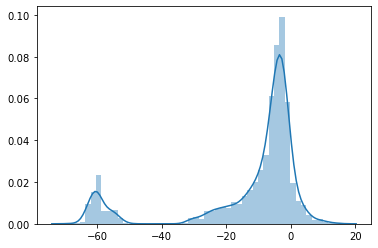

In [798]:
sns.distplot(model_2.fittedvalues);

#### Now, let us see the predicted probability values:

#### Prediction on Train set

In [799]:
Log2_ypred_train = model_2.predict(X_train)
Log2_ypred_train

842     6.696830e-02
1057    1.618037e-02
1595    1.372206e-01
100     7.339350e-01
1191    5.427487e-03
2163    8.501304e-27
2763    1.567949e-02
2701    3.377918e-05
2072    1.327481e-02
2349    5.412899e-04
1392    1.535345e-07
1621    4.601695e-02
1960    1.423663e-24
2148    3.541804e-12
571     3.782565e-28
1984    3.250181e-02
1592    3.177103e-03
3110    1.393162e-05
1564    5.704025e-25
2155    3.373595e-01
2905    1.743551e-04
2178    1.482875e-02
1842    2.318043e-02
297     5.500767e-01
1988    9.808069e-27
3061    3.339219e-01
1471    1.865758e-02
1425    1.346991e-26
3015    2.884712e-26
182     8.191051e-01
949     1.685102e-01
1122    8.839412e-03
2082    1.721910e-03
3010    2.503881e-02
3077    8.162344e-27
2713    1.713463e-04
1232    7.070209e-11
1175    2.081477e-06
21      9.999967e-01
329     1.326953e-01
1569    1.087719e-01
1219    3.494436e-06
2591    2.704814e-09
3205    2.089236e-05
3415    1.148433e-09
3481    1.727560e-03
69      8.647327e-01
1537    3.113

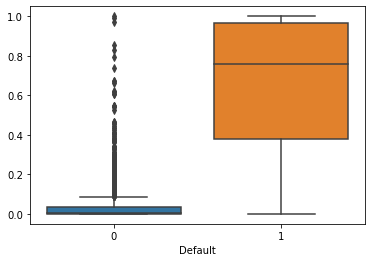

In [800]:
sns.boxplot(x=Company['default'],y=Log2_ypred_train)
plt.xlabel('Default');

From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model. Let us take a cut-off of 0.07 and check.

Let us now see the predicted classes

In [801]:
Log2_ypred=[]
for i in range(0,len(Log2_ypred_train)):
    if np.array(Log2_ypred_train)[i]>0.07:
        a=1
    else:
        a=0
    Log2_ypred.append(a)

#### Checking the accuracy of the model using confusion matrix for training set

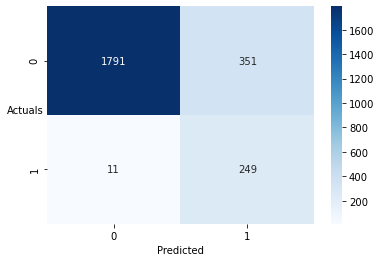

In [802]:
sns.heatmap((metrics.confusion_matrix(y_train,Log2_ypred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [803]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,Log2_ypred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1791 
False Positives: 351 
False Negatives: 11 
True Positives: 249


In [804]:
print(metrics.classification_report(y_train,Log2_ypred,digits=3))

              precision    recall  f1-score   support

           0      0.994     0.836     0.908      2142
           1      0.415     0.958     0.579       260

    accuracy                          0.849      2402
   macro avg      0.704     0.897     0.744      2402
weighted avg      0.931     0.849     0.873      2402



#### Insights:
- As observed above, accuracy of the model i.e. %overall correct predictions is 84%
- Sensitivity of the model is 95% i.e. 95% of those defaulted were correctly identified as defaulters by the model

#### Prediction on Test set

In [805]:
Log2_ypred_test = model_2.predict(X_test)
Log2_ypred_test

251     8.590417e-01
3493    8.990017e-27
3063    2.298437e-08
2384    5.523927e-04
1679    6.677799e-03
604     3.231074e-04
3434    7.501564e-07
2244    4.750327e-06
2523    3.537376e-06
2162    9.134625e-27
3102    3.034895e-11
1638    1.539234e-01
2046    1.217131e-26
1241    1.495420e-01
133     1.680559e-01
2294    1.860749e-04
2139    5.718872e-28
2844    1.058349e-01
1360    3.753166e-02
2896    8.516510e-28
407     3.570664e-01
1270    1.242106e-02
2021    2.369478e-03
1380    5.305836e-06
2938    9.796503e-02
2623    4.364027e-01
2992    2.692747e-27
1157    1.451996e-05
1036    1.896532e-02
1961    2.155364e-02
1700    2.987363e-05
283     7.727707e-01
3122    6.934938e-04
3533    1.107952e-27
655     9.709547e-02
3327    2.972019e-10
1127    1.068571e-03
2051    7.825318e-02
40      9.999385e-01
1536    2.848200e-07
1154    1.089738e-02
373     1.436622e-01
2081    4.704365e-05
3453    8.640785e-27
2873    7.184012e-03
3120    7.802788e-27
3279    5.591357e-02
1644    1.447

In [806]:
Log2_ypred=[]
for i in range(0,len(Log2_ypred_test)):
    if np.array(Log2_ypred_test)[i]>0.07:
        a=1
    else:
        a=0
    Log2_ypred.append(a)

#### Checking the accuracy of the model using confusion matrix for test set

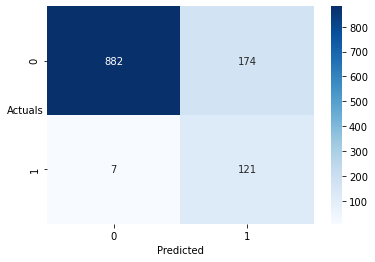

In [807]:
sns.heatmap((metrics.confusion_matrix(y_test,Log2_ypred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [808]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,Log2_ypred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 882 
False Positives: 174 
False Negatives: 7 
True Positives: 121


Let us now go ahead and print the classification report to check the various other parameters

In [809]:
print(metrics.classification_report(y_test,Log2_ypred,digits=3))

              precision    recall  f1-score   support

           0      0.992     0.835     0.907      1056
           1      0.410     0.945     0.572       128

    accuracy                          0.847      1184
   macro avg      0.701     0.890     0.740      1184
weighted avg      0.929     0.847     0.871      1184



#### Insights:
- As observed above, accuracy of the model i.e. %overall correct predictions is 84%
- Sensitivity of the model is 94% i.e. 94% of those defaulted were correctly identified as defaulters by the model

### Let us take a cut-off of 0.08 and check if our predictions have improved

In [810]:
Log2_ypred=[]
for i in range(0,len(Log2_ypred_train)):
    if np.array(Log2_ypred_train)[i]>0.08:
        a=1
    else:
        a=0
    Log2_ypred.append(a)

#### Checking the accuracy of the model using confusion matrix for training set

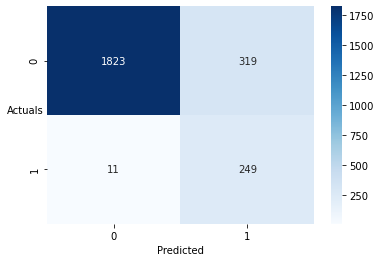

In [811]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,Log2_ypred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [812]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,Log2_ypred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1823 
False Positives: 319 
False Negatives: 11 
True Positives: 249


In [813]:
print(metrics.classification_report(y_train,Log2_ypred,digits=3))

              precision    recall  f1-score   support

           0      0.994     0.851     0.917      2142
           1      0.438     0.958     0.601       260

    accuracy                          0.863      2402
   macro avg      0.716     0.904     0.759      2402
weighted avg      0.934     0.863     0.883      2402



#### Insights:

- Accuracy of the model i.e. %overall correct predictions has increased from 84% to 86% and the sensitivity of the model is same as 95%.

#### Prediction on Test set

In [814]:
Log2_ypred_test = model_2.predict(X_test)
Log2_ypred_test

251     8.590417e-01
3493    8.990017e-27
3063    2.298437e-08
2384    5.523927e-04
1679    6.677799e-03
604     3.231074e-04
3434    7.501564e-07
2244    4.750327e-06
2523    3.537376e-06
2162    9.134625e-27
3102    3.034895e-11
1638    1.539234e-01
2046    1.217131e-26
1241    1.495420e-01
133     1.680559e-01
2294    1.860749e-04
2139    5.718872e-28
2844    1.058349e-01
1360    3.753166e-02
2896    8.516510e-28
407     3.570664e-01
1270    1.242106e-02
2021    2.369478e-03
1380    5.305836e-06
2938    9.796503e-02
2623    4.364027e-01
2992    2.692747e-27
1157    1.451996e-05
1036    1.896532e-02
1961    2.155364e-02
1700    2.987363e-05
283     7.727707e-01
3122    6.934938e-04
3533    1.107952e-27
655     9.709547e-02
3327    2.972019e-10
1127    1.068571e-03
2051    7.825318e-02
40      9.999385e-01
1536    2.848200e-07
1154    1.089738e-02
373     1.436622e-01
2081    4.704365e-05
3453    8.640785e-27
2873    7.184012e-03
3120    7.802788e-27
3279    5.591357e-02
1644    1.447

In [815]:
Log2_ypred=[]
for i in range(0,len(Log2_ypred_test)):
    if np.array(Log2_ypred_test)[i]>0.08:
        a=1
    else:
        a=0
    Log2_ypred.append(a)

#### Checking the accuracy of the model using confusion matrix for test set

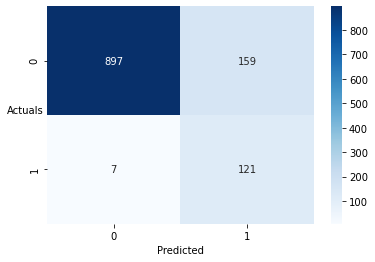

In [816]:
sns.heatmap((metrics.confusion_matrix(y_test,Log2_ypred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [817]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,Log2_ypred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 897 
False Positives: 159 
False Negatives: 7 
True Positives: 121


#### Let us now go ahead and print the classification report to check the various other parameters

In [818]:
print(metrics.classification_report(y_test,Log2_ypred,digits=3))

              precision    recall  f1-score   support

           0      0.992     0.849     0.915      1056
           1      0.432     0.945     0.593       128

    accuracy                          0.860      1184
   macro avg      0.712     0.897     0.754      1184
weighted avg      0.932     0.860     0.880      1184



#### Insights:
- Accuracy of the model i.e. %overall correct predictions is 86% & sensitivity of the model stands at 94%

- We may choose cutoff of 0.08 as it gave higher model sensitivity & overall accuracy of the model in test dataset

### Model 3 - Logistic Regression (Sklearn)

In [819]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()

#Fit Logistic Regression model
logreg.fit(X_train,y_train)

LogisticRegression()

#### Prediction on Train set

In [820]:
logreg_ypred_train = logreg.predict(X_train)
logreg_score_train = logreg.score(X_train, y_train)

In [821]:
#Confusion Matrix
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train,logreg_ypred_train),'\n')

Confusion Matrix 
 [[2107   35]
 [  74  186]] 



#### Classification report

In [822]:
print(metrics.classification_report(y_train,logreg_ypred_train,digits=3))

              precision    recall  f1-score   support

           0      0.966     0.984     0.975      2142
           1      0.842     0.715     0.773       260

    accuracy                          0.955      2402
   macro avg      0.904     0.850     0.874      2402
weighted avg      0.953     0.955     0.953      2402



#### Prediction on Test set

In [823]:
logreg_ypred_test = logreg.predict(X_test)
logreg_score_test = logreg.score(X_test, y_test)

In [824]:
#Confusion Matrix
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test,logreg_ypred_test),'\n')

Confusion Matrix 
 [[1031   25]
 [  35   93]] 



#### Classification report

In [825]:
print(metrics.classification_report(y_test,logreg_ypred_test,digits=3))

              precision    recall  f1-score   support

           0      0.967     0.976     0.972      1056
           1      0.788     0.727     0.756       128

    accuracy                          0.949      1184
   macro avg      0.878     0.851     0.864      1184
weighted avg      0.948     0.949     0.948      1184



In [826]:
#Checking the classification accuracy

#Train
Train_score = accuracy_score(y_train,logreg_ypred_train)
print('Accuracy Score for Train set is ',Train_score)

#Test
Test_score = accuracy_score(y_test,logreg_ypred_test)
print('Accuracy Score for Test set is ',Test_score)


Accuracy Score for Train set is  0.9546211490424646
Accuracy Score for Test set is  0.9493243243243243


#### Insights:
- Accuracy of the Logistic Model i.e. %overall correct predictions is 94% & sensitivity of the model stands at 73%
- 73% of those defaulted were correctly identified as defaulters by the model

### 1.8 Build a Random Forest Model on Train Dataset

### Model 3 - Random Forest

In [827]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
model_RF=RandomForestClassifier(n_estimators=100, max_leaf_nodes = 5)

#### Fit RF model

In [828]:
model_RF.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=5)

#### Predict on training datasets

In [829]:
RF_ypred_train = model_RF.predict(X_train)
RFmodel_score_train = model_RF.score(X_train, y_train)

In [830]:
#Confusion Matrix
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train,RF_ypred_train),'\n')

Confusion Matrix 
 [[2126   16]
 [  31  229]] 



#### Classification report

In [831]:
print(metrics.classification_report(y_train,RF_ypred_train,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.993     0.989      2142
           1      0.935     0.881     0.907       260

    accuracy                          0.980      2402
   macro avg      0.960     0.937     0.948      2402
weighted avg      0.980     0.980     0.980      2402



### 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices

#### Predict on test datasets

In [832]:
RF_ypred_test = model_RF.predict(X_test)
RFmodel_score_test = model_RF.score(X_test, y_test)

In [833]:
#Confusion Matrix
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test,RF_ypred_test),'\n')

Confusion Matrix 
 [[1052    4]
 [  17  111]] 



#### Classification report

In [834]:
print(metrics.classification_report(y_test,RF_ypred_test,digits=3))

              precision    recall  f1-score   support

           0      0.984     0.996     0.990      1056
           1      0.965     0.867     0.914       128

    accuracy                          0.982      1184
   macro avg      0.975     0.932     0.952      1184
weighted avg      0.982     0.982     0.982      1184



In [835]:
#Checking the classification accuracy

#Train
Train_score = accuracy_score(y_train,RF_ypred_train)
print('Accuracy Score for Train set is ',Train_score)

#Test
Test_score = accuracy_score(y_test,RF_ypred_test)
print('Accuracy Score for Test set is ',Test_score)


Accuracy Score for Train set is  0.9804329725228976
Accuracy Score for Test set is  0.9822635135135135


### 1.10 Build an LDA Model on Train Dataset

#### Linear Discriminant Analysis (LDA)

In [836]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score

lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train,y_train)

lda_ypred_train = model_lda.predict(X_train)
lda_ypred_test = model_lda.predict(X_test)

### 1.11 Validate the LDA Model on test Dataset and state the performance matrices

#### Model evaluation on test data set

In [837]:
#Confusion Matrix
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test,lda_ypred_test),'\n')

#Classification Report
print('Classification Report','\n',metrics.classification_report(y_test,lda_ypred_test))

Confusion Matrix 
 [[1041   15]
 [  98   30]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1056
           1       0.67      0.23      0.35       128

    accuracy                           0.90      1184
   macro avg       0.79      0.61      0.65      1184
weighted avg       0.89      0.90      0.88      1184



In [838]:
#Checking the classification accuracy

#Train
Train_score = accuracy_score(y_train,lda_ypred_train)
print('Accuracy Score for Train set is ',Train_score)

#Test
Test_score = accuracy_score(y_test,lda_ypred_test)
print('Accuracy Score for Test set is ',Test_score)


Accuracy Score for Train set is  0.906744379683597
Accuracy Score for Test set is  0.9045608108108109


### 1.12 Compare the performances of all the three models (include ROC Curve)

#### Comparison of Three Models (Logistic Regression, Random Forest and LDA  )

AUC for Logistic Regression Train Model_2 is 0.9644185879479996
AUC for Random Forest Train Model is 0.9912518853695325
AUC for Linear Discriminant Analysis Train Model is 0.9055393952452775


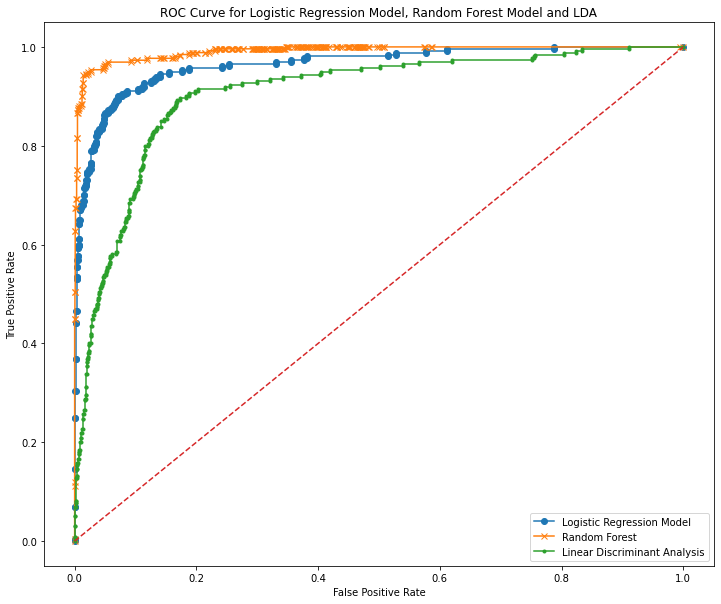

In [839]:
#Train: 

models_names={logreg:'Logistic Regression Model', model_RF:'Random Forest', model_lda:'Linear Discriminant Analysis',}

logreg_train_auc=roc_auc_score(y_train,logreg.predict_proba(X_train)[:,1])
print('AUC for Logistic Regression Train Model_2 is',logreg_train_auc)
RF_train_auc=roc_auc_score(y_train,model_RF.predict_proba(X_train)[:,1])
print('AUC for Random Forest Train Model is',RF_train_auc)
lda_train_auc=roc_auc_score(y_train,model_lda.predict_proba(X_train)[:,1])
print('AUC for Linear Discriminant Analysis Train Model is',lda_train_auc)

plt.figure(figsize=(12,10))

fpr_logreg, tpr_logreg, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.plot(fpr_logreg, tpr_logreg, marker='o')

fpr_model_RF, tpr_model_RF, thresholds = roc_curve(y_train, model_RF.predict_proba(X_train)[:,1])
plt.plot(fpr_model_RF, tpr_model_RF, marker='x')

fpr_model_lda, tpr_model_lda, thresholds = roc_curve(y_train, model_lda.predict_proba(X_train)[:,1])
plt.plot(fpr_model_lda, tpr_model_lda, marker='.')
         
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression Model, Random Forest Model and LDA'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

AUC for Logistic Regression Test Model_2 is 0.9505282315340909
AUC for Random Forest Test Model is 0.9875118371212122
AUC for Linear Discriminant Analysis Test Model is 0.8722034801136364


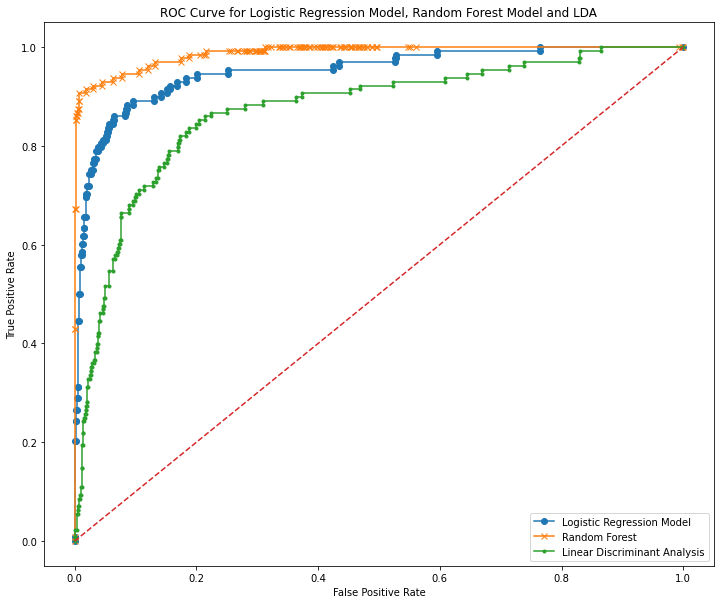

In [840]:
#Test:

models_names={logreg:'Logistic Regression Model', model_RF:'Random Forest', model_lda:'Linear Discriminant Analysis',}

logreg_train_auc=roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print('AUC for Logistic Regression Test Model_2 is',logreg_train_auc)
RF_train_auc=roc_auc_score(y_test,model_RF.predict_proba(X_test)[:,1])
print('AUC for Random Forest Test Model is',RF_train_auc)
lda_train_auc=roc_auc_score(y_test,model_lda.predict_proba(X_test)[:,1])
print('AUC for Linear Discriminant Analysis Test Model is',lda_train_auc)

plt.figure(figsize=(12,10))

fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr_logreg, tpr_logreg, marker='o')

fpr_model_RF, tpr_model_RF, thresholds = roc_curve(y_test, model_RF.predict_proba(X_test)[:,1])
plt.plot(fpr_model_RF, tpr_model_RF, marker='x')

fpr_model_lda, tpr_model_lda, thresholds = roc_curve(y_test, model_lda.predict_proba(X_test)[:,1])
plt.plot(fpr_model_lda, tpr_model_lda, marker='.')
         
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression Model, Random Forest Model and LDA'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()


### 1.13 Recommendation

- It appears that all models performed well for the defauters, with precision, recall metrics all above 0.7.
- Both models performance is almost the same for the non-defaulters and arguably the “more important” classification of whether a company is going to default or not.
- AUC for Random Forest Analysis Test Model is 98%
- AUC for Logistic Regression Model Test Model is 95%

- Accuracy of the Random Forest Model i.e. %overall correct predictions is 98% & sensitivity of the model stands at 84%
- Recall: 84% of those defaulted were correctly identified as defaulters by the model.   

- Accuracy of the Logistic Model i.e. %overall correct predictions is 94% & sensitivity of the model stands at 73%
- Recall: 73% of those defaulted were correctly identified as defaulters by the model.

### Part 2 Market Risk

The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

#### Importing the dataset

In [841]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### Fixing messy column names (containing spaces) for ease of use

In [842]:
stock_prices.columns = stock_prices.columns.str.strip().str.replace(' ', '_')

#### Checking top 5 rows again

In [843]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### First, let us check the number of rows (observations) and the number of columns (variables)

In [844]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


#### Checking data types of all columns

In [845]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [846]:
stock_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian_Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra_&_Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis_Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree_Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun_Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal_Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea_Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet_Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


### 2.1 Draw Stock Price Chart for any 2 variables

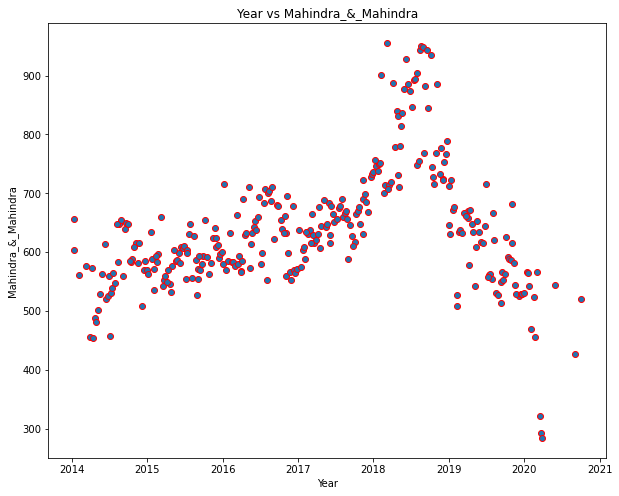

In [847]:
plt.figure(figsize = (10, 8))
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['Date'], stock_prices['Mahindra_&_Mahindra'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Mahindra_&_Mahindra')
plt.title('Year vs Mahindra_&_Mahindra')

plt.show()

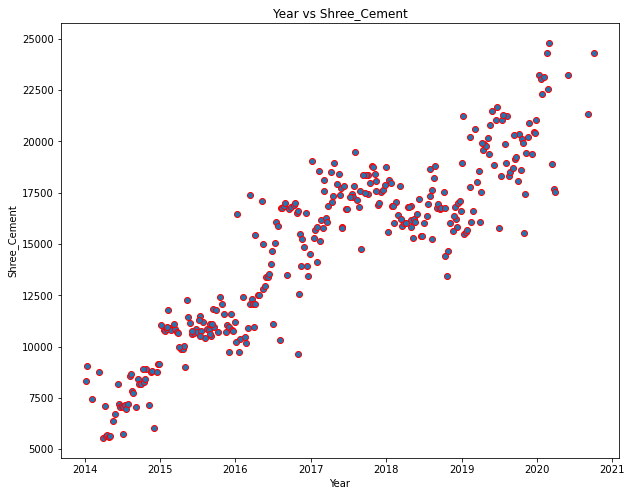

In [848]:
plt.figure(figsize = (10, 8))
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['Date'], stock_prices['Shree_Cement'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Year vs Shree_Cement')
plt.show()

#### This stock is on increasing trend since it does not have much concentration on the particular area

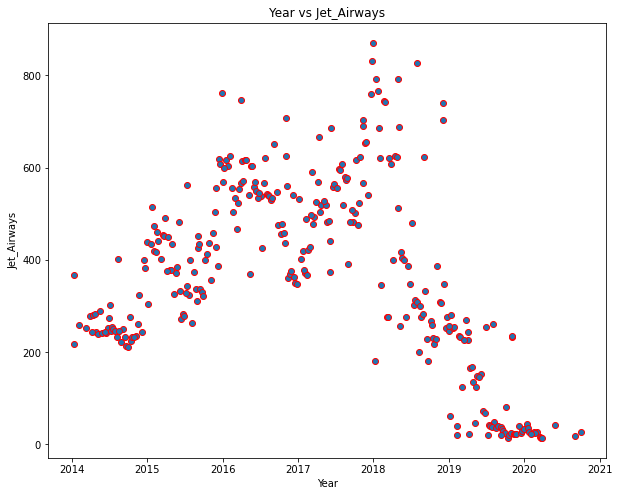

In [849]:
plt.figure(figsize = (10, 8))
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['Date'], stock_prices['Jet_Airways'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Jet_Airways')
plt.title('Year vs Jet_Airways')

plt.show()

### 2.2 Calculate Returns

#### Steps for calculating returns from prices:

Take logarithms
Take differences

In [850]:
stock_returns = np.log(stock_prices.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 

#### Checking the rows & columns of dataset

In [851]:
stock_returns.shape

(314, 10)

#### Checking top 5 rows

In [852]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


### 2.3 Calculate Stock Means and Standard Deviation

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means

In [853]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

#### Calculating stock standard deviation

In [854]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

### 2.4 Draw a plot of Stock Means vs Standard Deviation and share insights

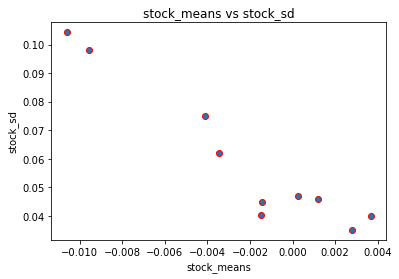

In [855]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()

#### Insights:

Stock with a lower mean & higher standard deviation do not play a role in a portfolio that has competing stock with more returns & less risk. Thus for the data we have here, we are only left few stocks:

- One with highest return and lowest risk &
- One with lowest risk and highest return

Therefore from pure ***Returns*** perspective, ***Shree_Cement*** looks good in this dataset & from pure ***Risk*** perspective (as measured by standard deviation), ***Infosys*** followed by ***Shree_Cement*** & ***Mahindra_&_Mahindra*** looks good in this datase

### END